In [ ]:
import sqlite3
import sqlalchemy
import pandas as pd

In [ ]:
try:
    conn = sqlite3.connect("wjazzd.db")
except Exception as e:
    print(e)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

df = pd.read_sql_query('''
                       SELECT melody.melid, melody.pitch, melody.onset, melody.duration, solo_info.instrument
                       FROM melody
                       JOIN solo_info
                       ON melody.melid = solo_info.melid
                       ''', conn)
conn.close()

In [ ]:
df['instrument'].unique()


In [ ]:
df.to_csv('pitches_w_instruments.csv')

In [ ]:
try:
    conn = sqlite3.connect("wjazzd.db")
except Exception as e:
    print(e)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

df = pd.read_sql_query('''
                       SELECT *
                       FROM beats
                       ''', conn)
conn.close()

In [15]:
import my_functions
import importlib
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

import my_functions
import importlib
importlib.reload(my_functions)

<module 'my_functions' from '/Users/teovargo/MusicGenProject/my_functions.py'>

In [12]:
df = my_functions.extract_notes()

In [24]:
df.head()
df['step'] = df['start'] - df['start'].shift(1)

# Fix up the first one cause of the wacky shift problem
df.loc[0,"step"] = 0

In [14]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))
  
  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

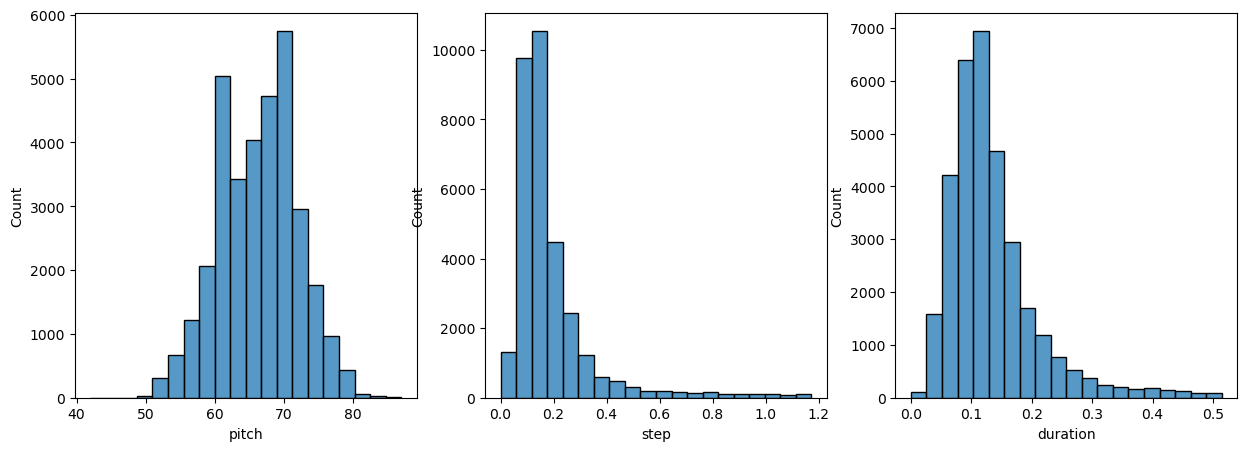

In [26]:
plot_distributions(df[df['instrument']=='as'])

In [17]:
[df['instrument'] == 'cl']

[0          True
 1          True
 2          True
 3          True
 4          True
           ...  
 200804    False
 200805    False
 200806    False
 200807    False
 200808    False
 Name: instrument, Length: 200809, dtype: bool]